# Algorithmic Trading: Case Study

Algorithmic Trading is when people use mathematical algorithms and predefined strategies to trade in the stock market. This way of trading is faster, more efficient and more consistent than manual trading. It’s like you’re playing a game where you need to make quick decisions, and a predefined strategy can help you make those decisions faster and better.

In [10]:
# !pip install numpy
# !pip install pandas
#!pip install seaborn

## Import required libraries

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

In [7]:
## Load input data

data = pd.read_csv("../data/aapl.csv")

In [9]:
data.shape

(251, 8)

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-21 00:00:00-05:00,163.471251,165.370233,161.363489,161.472855,122848900,0.0,0.0
1,2022-01-24 00:00:00-05:00,159.096650,161.363493,153.807340,160.687408,162294600,0.0,0.0
2,2022-01-25 00:00:00-05:00,158.062630,161.820817,156.113949,158.858017,115798400,0.0,0.0
3,2022-01-26 00:00:00-05:00,162.556552,163.441416,156.909335,158.768539,108275300,0.0,0.0
4,2022-01-27 00:00:00-05:00,161.512612,162.894591,157.366676,158.301254,121954600,0.0,0.0


## Data Understanding

In [11]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

*We can observe that the datatype of the Date column is object and can be converted to date*

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   Close         251 non-null    float64
 5   Volume        251 non-null    int64  
 6   Dividends     251 non-null    float64
 7   Stock Splits  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [14]:
def dstats(df):
    
    output_df = pd.DataFrame(columns=["Feature","Records","Fill_rate","%Null","dtype","n_unique","sample_data","Nulls"])
    for i in df.columns:
        Feature = i
        dtype = df[i].dtype
        size = df[i].shape[0]
        nulls = df[i].isnull().sum()
        Records = size - nulls
        n_unique = df[i].nunique()
        unique_list = df[i].unique()
        sample_data = unique_list[:3]
        null_percent = round((nulls / size) * 100, 2)
        fill_rate = round(100 - null_percent, 2)
        final_df = pd.DataFrame([[Feature,Records,fill_rate,null_percent,dtype,n_unique,sample_data,nulls]],
            columns=["Feature","Records","Fill_rate","%Null","dtype","n_unique","sample_data","Nulls"])
        output_df = pd.concat([output_df, final_df], ignore_index=True)

    output_df = output_df[["Feature","dtype","Records","Nulls","Fill_rate","%Null","n_unique","sample_data"]]
    return output_df

In [15]:
dstats(data)

,Feature,dtype,Records,Nulls,Fill_rate,%Null,n_unique,sample_data
0,Date,object,251,0,100.0,0.0,251,"[2022-01-21 00:00:00-05:00, 2022-01-24 00:00:0..."
1,Open,float64,251,0,100.0,0.0,251,"[163.47125091657557, 159.09664993875282, 158.0..."
2,High,float64,251,0,100.0,0.0,251,"[165.3702333480158, 161.36349257070873, 161.82..."
3,Low,float64,251,0,100.0,0.0,250,"[161.36348873677323, 153.807340350361, 156.113..."
4,Close,float64,251,0,100.0,0.0,248,"[161.4728546142578, 160.68740844726562, 158.85..."
5,Volume,int64,251,0,100.0,0.0,251,"[122848900, 162294600, 115798400]"
6,Dividends,float64,251,0,100.0,0.0,3,"[0.0, 0.22, 0.23]"
7,Stock Splits,float64,251,0,100.0,0.0,1,[0.0]


*There are no missing values in the data*

In [43]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000,251.000,251.000,251.000,251.000,251.000,251.000
mean,152.212,154.315,150.133,152.296,87085139.044,0.004,0.000
std,13.033,12.930,13.061,13.071,23941686.835,0.029,0.000
min,126.010,127.770,124.170,125.020,35195900.000,0.000,0.000
25%,142.285,144.390,140.194,142.229,70704850.000,0.000,0.000
50%,150.768,153.426,149.113,151.070,82291200.000,0.000,0.000
75%,163.107,165.498,161.007,163.295,96038150.000,0.000,0.000
max,177.746,178.801,175.904,178.154,182602000.000,0.230,0.000


## Data Exploration

In [18]:
data.Date

0      2022-01-21 00:00:00-05:00
1      2022-01-24 00:00:00-05:00
2      2022-01-25 00:00:00-05:00
3      2022-01-26 00:00:00-05:00
4      2022-01-27 00:00:00-05:00
                 ...            
246    2023-01-13 00:00:00-05:00
247    2023-01-17 00:00:00-05:00
248    2023-01-18 00:00:00-05:00
249    2023-01-19 00:00:00-05:00
250    2023-01-20 00:00:00-05:00
Name: Date, Length: 251, dtype: object

In [31]:
data['date_cleaned'] = data.Date.apply(lambda x: datetime.strptime(x[:-6], '%Y-%m-%d %H:%M:%S'))

In [77]:
print(data['date_cleaned'].min())
print(data['date_cleaned'].max())

2022-01-21 00:00:00
2023-01-20 00:00:00


*We can see that values in Date column range from 2022 Jan 21st to 2023 Jan 20. We can create a continuous index for this date range* 

In [78]:
date_index = pd.DataFrame()
date_index['index'] = pd.date_range(start=datetime(2022,1,21),end=datetime(2023,1,20),freq='D')

final_df = date_index.merge(data, how='left', left_on ='index', right_on = 'date_cleaned')
final_df = final_df.drop(['Date', 'date_cleaned'], axis=1)
final_df.set_index('index', inplace=True)

In [79]:
final_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
index,,,,,,,
2022-01-21,163.471,165.370,161.363,161.473,122848900.000,0.000,0.000
2022-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-24,159.097,161.363,153.807,160.687,162294600.000,0.000,0.000
2022-01-25,158.063,161.821,156.114,158.858,115798400.000,0.000,0.000


In [80]:
final_df.index

DatetimeIndex(['2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30',
               ...
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14',
               '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18',
               '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', name='index', length=365, freq=None)

In [81]:
def clean_col_names(col):
    col = col.lower()
    col = '_'.join(col.split())
    return col

#clean column names
final_df.columns = final_df.columns.map(clean_col_names)
print(final_df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits'], dtype='object')


### Train Test Split

*Before proceeding further we can split the data into train, test sets and keep the test set aside for validation*

In [127]:
# Train Test Split

train_df = final_df.iloc[:284] #data for 10 months
test_df = final_df.iloc[284:] #data for last 2 months

*Now we have the data for a complete year with continuous date range*

### Missing Values

In [128]:
train_df.describe()

,open,high,low,close,volume,dividends,stock_splits
count,284.000,284.000,284.000,284.000,284.000,284.000,284.000
mean,155.671,157.800,153.521,155.693,91328692.958,0.002,0.000
std,12.180,11.878,12.052,11.937,25847448.309,0.023,0.000
min,129.674,131.987,128.648,129.664,51218200.000,0.000,0.000
25%,144.948,147.605,143.988,146.484,74188500.000,0.000,0.000
50%,156.362,158.759,153.804,156.204,85925600.000,0.000,0.000
75%,165.806,168.179,163.289,165.125,101719325.000,0.000,0.000
max,177.746,178.801,175.904,178.154,182602000.000,0.230,0.000


In [129]:
train_df.isna().sum()

open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

We can fill the missing values in the data

- Stock Splits: As this column has only one value we can fill it with 0
- Dividends: it can be observed that 75% of the data is 0 so we can fill the missing values with 0 
- Volume, Open, High, Low, Close - We are going to forward fill the columns 

In [130]:
def fillMissingValues(data):
    ffill_cols = ['open','high','low','close','volume']
    
    data['stock_splits'] = data['stock_splits'].fillna(data['stock_splits'].median())
    data['dividends'] = data['dividends'].fillna(data['dividends'].median())
    
    data.loc[:,ffill_cols] = data.loc[:,ffill_cols].ffill(axis = 0)
    
    return data

In [131]:
train_df = fillMissingValues(train_df)

In [132]:
train_df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

## Visualizing the data

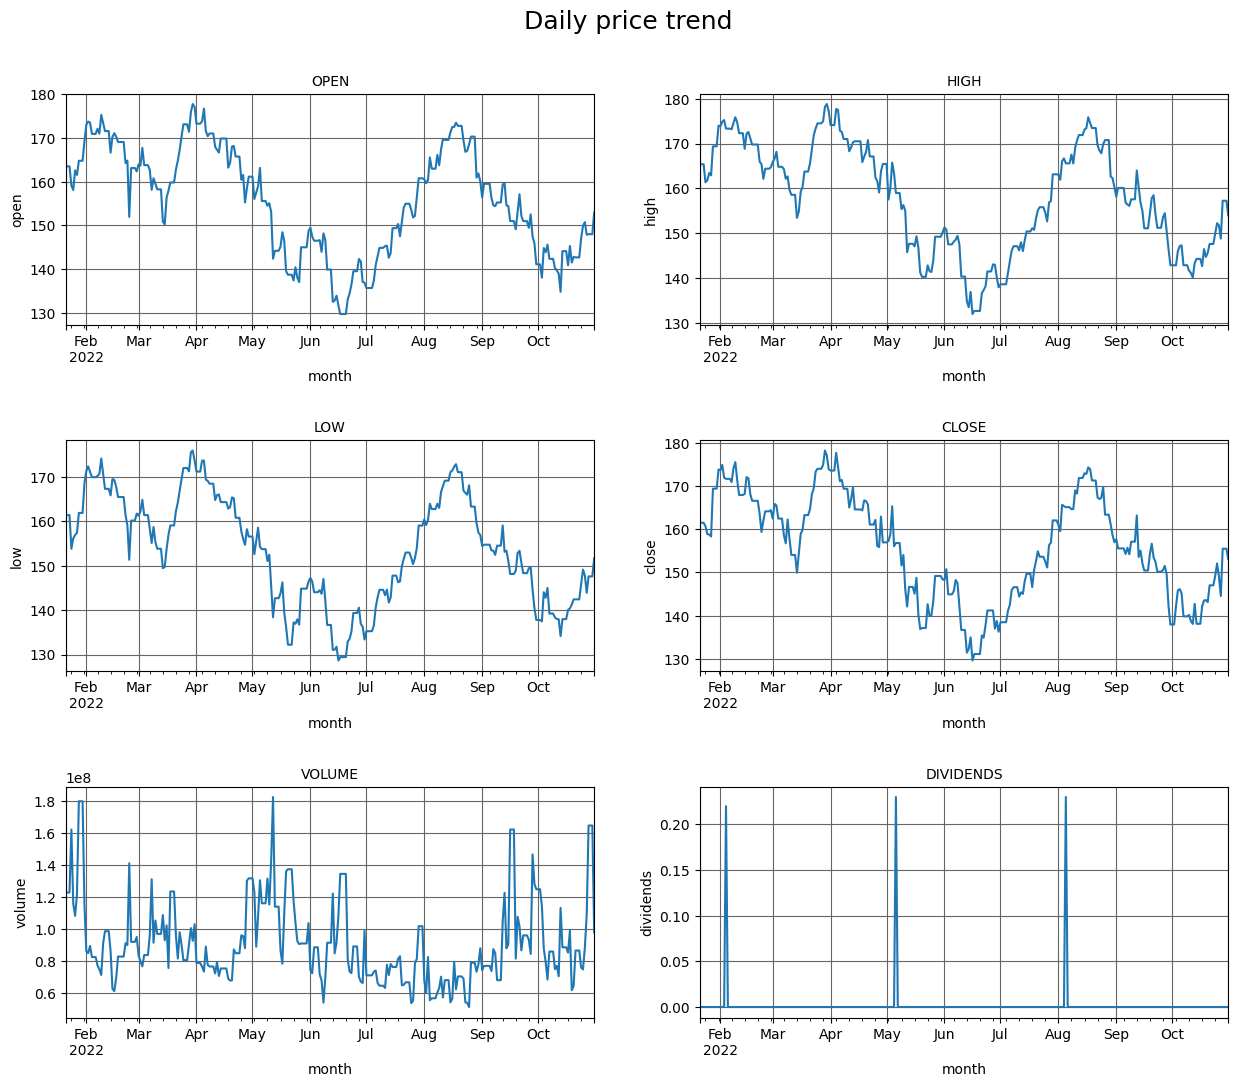

In [162]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily price trend", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, column in enumerate(train_df.columns):

    if column=='stock_splits':
        continue
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    train_df[column].plot(ax=ax,linewidth=1.5)

    # chart formatting
    ax.set_ylabel(column, size=10)
    ax.set_xlabel('month', size=10)
    ax.set_title(column.upper(), size=10)
    ax.grid(b=True, which='major', color='#666666', linestyle='-')
    
plt.show()

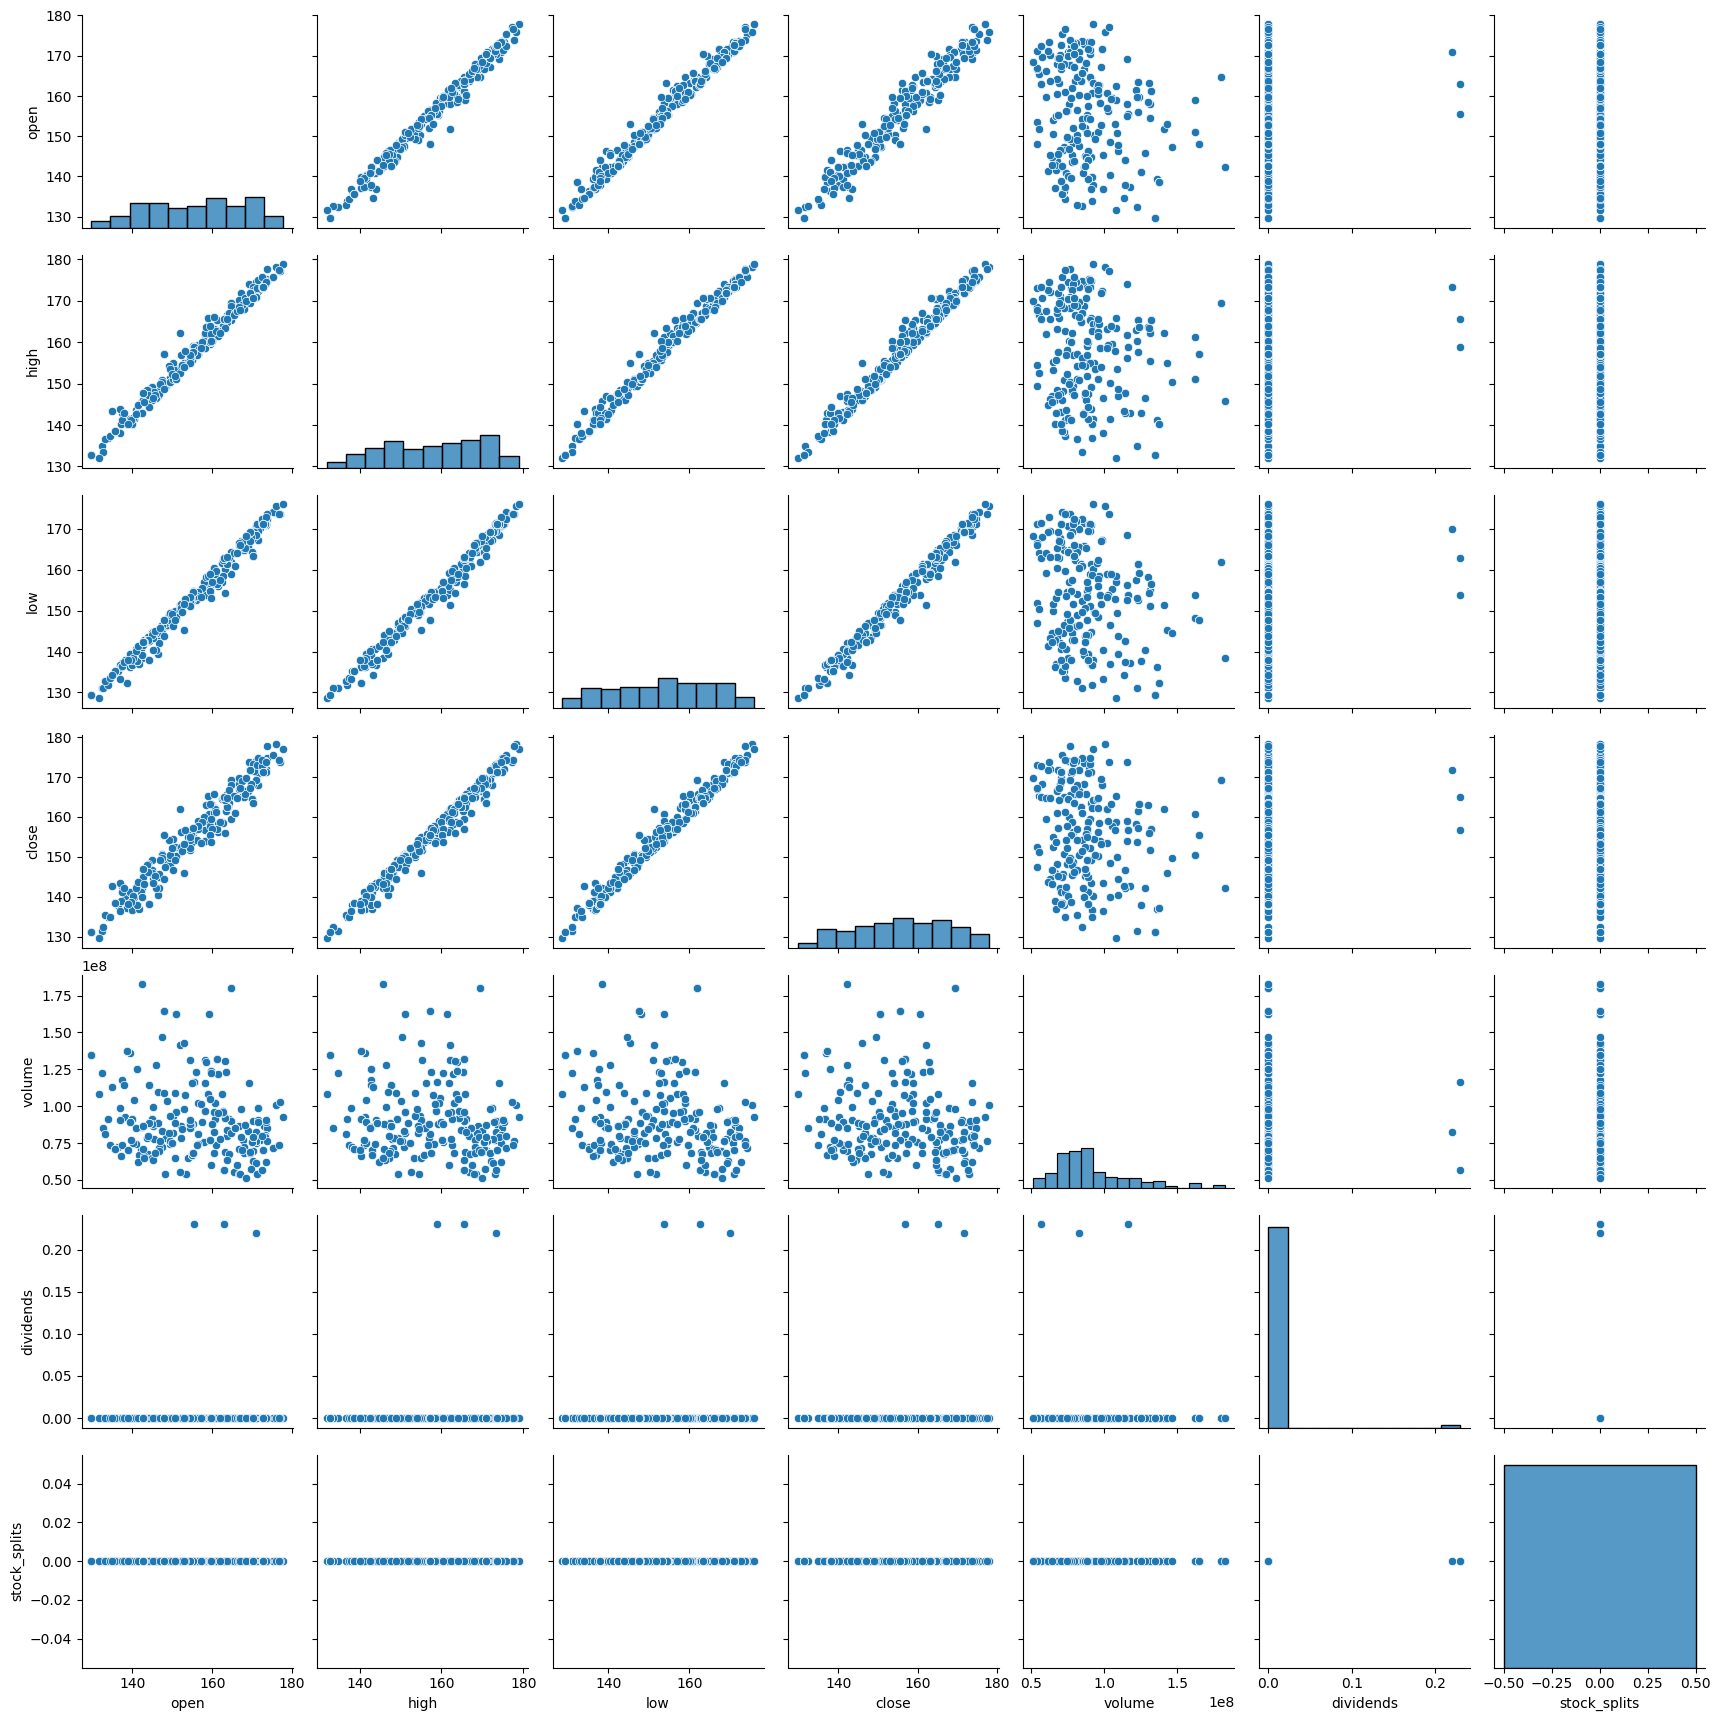

In [177]:
sns.pairplot(train_df)